In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shapefile as shp
from pyproj import CRS

%matplotlib inline

In [31]:
with open("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/Birds_of_Prey.csv") as csv_file:
    df = pd.read_csv(csv_file)
    print(df["COMMON NAME"].unique())
    print(len(df["COMMON NAME"].unique()))
    print(df.head())

['Bald Eagle' "Cooper's Hawk" 'Osprey' 'Red-tailed Hawk'
 'American Kestrel' 'White-tailed Kite' 'Sharp-shinned Hawk'
 'Northern Harrier' 'Peregrine Falcon' 'Great Horned Owl' 'Golden Eagle'
 "Sharp-shinned/Cooper's Hawk" 'Red-shouldered Hawk' 'Western Screech-Owl'
 'Barn Owl' 'Short-eared Owl' 'Burrowing Owl' 'Northern Goshawk'
 'Prairie Falcon' 'Ferruginous Hawk' 'Northern Saw-whet Owl'
 'Long-eared Owl' "Swainson's Hawk" 'Broad-winged Hawk'
 'Northern Pygmy-Owl' 'Merlin' 'Rough-legged Hawk' 'Zone-tailed Hawk'
 'Snowy Owl' 'Flammulated Owl' 'Barred Owl' "Harris's Hawk"
 'Mississippi Kite' 'owl sp.' 'hawk sp.' 'falcon sp.' 'Common Black Hawk'
 'eagle sp.' 'Golden/Bald Eagle' "Cooper's Hawk/Northern Goshawk"
 'large falcon sp.' 'Swallow-tailed Kite' 'Buteo/eagle sp.'
 'Eurasian Kestrel' 'small falcon sp.' 'Gray Hawk'
 'Long-eared/Short-eared Owl'
 'Common Black x Red-shouldered Hawk (hybrid)'
 'Spotted x Barred Owl (hybrid)' 'Elf Owl'
 'Peregrine x Prairie Falcon (hybrid)'
 'Red-tailed

  OBSERVATION DATE   LATITUDE   LONGITUDE     COUNTY
0  1999-01-18 0:00  41.754666 -124.202714  Del Norte
1  1996-10-13 0:00  33.531253 -117.075205  Riverside
2  1983-10-30 0:00  38.936017 -121.330532     Placer
3  1997-08-22 0:00  33.462797 -115.980082  Riverside
4  1995-09-11 0:00  35.615712 -118.251686       Kern


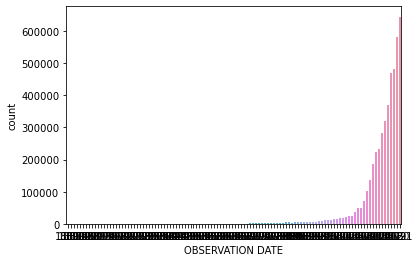

In [32]:
# Show total sightings over time
# Truncate date to year
# https://www.geeksforgeeks.org/creating-a-time-series-plot-with-seaborn-and-pandas/

df['OBSERVATION DATE'] = pd.to_datetime(df['OBSERVATION DATE']).astype(str) + ' 0:00'

df_locs = df[['OBSERVATION DATE', 'LATITUDE', 'LONGITUDE', 'COUNTY']]
# df.groupby(by=[df.index.month, df.index.year])
print(df_locs.head())


sns.countplot(data = df, x=pd.DatetimeIndex(df['OBSERVATION DATE']).year)
plt.show()


In [33]:
#Starting the Lat/Long plotting


CA_counties_data = gpd.read_file("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/CA_Counties/CA_Counties_TIGER2016.shp")
CA_counties = pd.DataFrame()
CA_counties = CA_counties.append(CA_counties_data)
CA_counties


kepler_merged_df = pd.merge(df_locs,CA_counties, how = 'left', left_on='COUNTY', right_on = 'NAME')
kepler_merged_df


,OBSERVATION DATE,LATITUDE,LONGITUDE,COUNTY,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,1999-01-18 0:00,41.754666,-124.202714,Del Norte,06,015,01682074,06015,Del Norte,Del Norte County,...,G4020,None,18860,None,A,2.606100e+09,5.787604e+08,+41.7499033,-123.9809983,"POLYGON ((-13838807.959 5120380.774, -13840421..."
1,1996-10-13 0:00,33.531253,-117.075205,Riverside,06,065,00277297,06065,Riverside,Riverside County,...,G4020,348,40140,None,A,1.866421e+10,2.509270e+08,+33.7298275,-116.0022389,"POLYGON ((-13099281.751 4011348.117, -13099285..."
2,1983-10-30 0:00,38.936017,-121.330532,Placer,06,061,00277295,06061,Placer,Placer County,...,G4020,472,40900,None,A,3.644333e+09,2.464869e+08,+39.0620323,-120.7227181,"POLYGON ((-13476944.153 4722608.150, -13476936..."
3,1997-08-22 0:00,33.462797,-115.980082,Riverside,06,065,00277297,06065,Riverside,Riverside County,...,G4020,348,40140,None,A,1.866421e+10,2.509270e+08,+33.7298275,-116.0022389,"POLYGON ((-13099281.751 4011348.117, -13099285..."
4,1995-09-11 0:00,35.615712,-118.251686,Kern,06,029,02054176,06029,Kern,Kern County,...,G4020,None,12540,None,A,2.106159e+10,7.957476e+07,+35.3466288,-118.7295064,"POLYGON ((-13348728.860 4223737.154, -13349798..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518063,1984-03-03 0:00,34.436575,-118.609858,Los Angeles,06,037,00277283,06037,Los Angeles,Los Angeles County,...,G4020,348,31080,31084,A,1.051065e+10,1.794730e+09,+34.1963983,-118.2618616,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
4518064,1999-12-10 0:00,39.002042,-123.084710,Mendocino,06,045,00277287,06045,Mendocino,Mendocino County,...,G4020,None,46380,None,A,9.081422e+09,9.629515e+08,+39.4323876,-123.4428811,"POLYGON ((-13785630.372 4801473.843, -13785768..."
4518065,1995-07-09 0:00,41.012147,-121.652260,Shasta,06,089,01682610,06089,Shasta,Shasta County,...,G4020,454,39820,None,A,9.778179e+09,1.865302e+08,+40.7605142,-122.0435556,"POLYGON ((-13649470.940 4994815.777, -13649410..."
4518066,1997-12-30 0:00,37.465594,-121.520119,Santa Clara,06,085,00277307,06085,Santa Clara,Santa Clara County,...,G4020,488,41940,None,A,3.344210e+09,3.327643e+07,+37.2207774,-121.6906224,"POLYGON ((-13585890.862 4467090.861, -13585887..."


In [34]:
from keplergl import KeplerGl
kepler_map = KeplerGl(height = 800, data={'Bird Data': kepler_merged_df})
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


ValueError: Can't clean for JSON: <shapely.geometry.polygon.Polygon object at 0x7fe36d349af0>

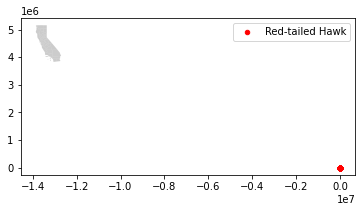

In [12]:
fig,ax = plt.subplots()
CA_counties.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df["COMMON NAME"] == "Red-tailed Hawk"]['geometry'].plot(ax = ax, 
                                                        markersize = 20, color = 'red', 
                                                        marker = 'o', label = "Red-tailed Hawk")
                                                  
plt.legend()

In [ ]:
###Old code I can't quite get rid of yet

# geometry = [Point(xy) for xy in zip( df["LONGITUDE"], df["LATITUDE"])]
# geometry[:3]
# # crs = CRS("EPSG:4326 ")
# crs = CRS("WGS84")

# geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
# geo_df.head()



# # print(df['COMMON NAME'].value_counts())
# for name in list(df['COMMON NAME'].unique()):
#     print(df["COMMON NAME" == name].value_counts())
# #     if df[name].value_counts() < 10:
# #         df.drop(df[df[name]], inplace = True)
# print(df['COMMON NAME'].unique())



# vc = df.value_counts()
# df[~df['COMMON NAME'].isin(vc[:-15])]

